In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
desviacion_estandar_esperada =  np.arange(0, 37, 1).std()
desviacion_estandar_esperada

10.677078252031311

In [253]:
varianza_esperada = np.arange(0, 37, 1).var()
varianza_esperada

114.0

In [254]:
esperanza_matematica_esperada = np.arange(0, 37, 1).mean()
esperanza_matematica_esperada

18.0

In [255]:
cantidad_tiradas = 4000
numero_elegido = 11
cantidad_corridas = 10
tiradas = np.random.randint(0, 37, cantidad_tiradas)
tiradas

array([ 7, 10, 14, ..., 14, 20, 12])

In [256]:
col_to_keys = {
    'desv_est': {
        'title': f'DESVÍO ESTANDAR DEL NUMERO {numero_elegido}',
        'ylabel': 'vd (valor del desvio)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vde (valor del desvio esperado)'
    },
    'var': {
        'title': f'VARIANZA DEL NUMERO {numero_elegido}',
        'ylabel': 'vv (valor de la varianza)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vve (valor de la varianza esperada)'
    },
    'frec_rel': {
        'title': f'FRECUENCIA RELATIVA DEL NUMERO {numero_elegido}',
        'ylabel': 'fr (frecuencia relativa)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'frn (frecuencia relativa esperada)'
    },
    'frec_rel_%': {
        'title': f'FRECUENCIA RELATIVA (%) DEL NUMERO {numero_elegido}',
        'ylabel': 'fr (frecuencia relativa)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'frn (frecuencia relativa esperada)'
    },
    'esp_mat': {
        'title': f'ESPERANZA MATEMATICA DEL NUMERO {numero_elegido}',
        'ylabel': 'vp (valor promedio de las tiradas)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vpe (valor promedio esperado)'
    }
}

lineas_horizontales = {
    'desv_est': desviacion_estandar_esperada,
    'var': varianza_esperada,
    'esp_mat': esperanza_matematica_esperada,
    'frec_rel': 1/37,
    'frec_rel_%': (1/37)*100
}

In [257]:
def ejecutar_corrida():
    df = pd.DataFrame()
    df['tiradas'] = np.random.randint(0, 37, cantidad_tiradas)

    frec_abs_acumulada = []
    frec_rel_acumulada = []
    esp_mat_acumulada = []
    desv_est_acumulada = []
    var_acumulada = []

    cantidad_ocurrencias = 0
    for index, tirada in enumerate(df['tiradas']):
        if tirada == numero_elegido:
            cantidad_ocurrencias += 1
        frec_abs_acumulada.append(cantidad_ocurrencias)
        frec_rel_acumulada.append(cantidad_ocurrencias/(index+1))
        esp_mat_acumulada.append(np.mean(df['tiradas'][:index+1]))
        desv_est_acumulada.append(np.std(df['tiradas'][:index+1]))
        var_acumulada.append(np.var(df['tiradas'][:index+1]))

    df['frec_abs'] = frec_abs_acumulada
    df['frec_rel'] = frec_rel_acumulada
    df['frec_rel_%'] = np.array(frec_rel_acumulada) * 100
    df['esp_mat'] = esp_mat_acumulada
    df['desv_est'] = desv_est_acumulada
    df['var'] = var_acumulada
    
    df.index = df.index + 1
    
    return df

In [258]:
def graficar(corridas, es_promedio):
    for col in ['desv_est', 'var', 'esp_mat', 'frec_rel', 'frec_rel_%']:
        plt.figure()
        
        for corrida in corridas:
            sns.lineplot(x=corrida.index, y=corrida[col], alpha=0.6, linewidth=2, label=None)

        if col in lineas_horizontales:
            valor_esperado = lineas_horizontales[col]
            esperado_label = col_to_keys[col]['esperado_label']
            plt.axhline(valor_esperado, color='red', linestyle='--',
                        label=f'{esperado_label} = {valor_esperado:.4f}')            

        title = f'{col_to_keys[col]['title']}{' PROMEDIO' if es_promedio else ''} - {cantidad_corridas} corridas'
        xlabel = col_to_keys[col]['xlabel']
        ylabel = col_to_keys[col]['ylabel']
        
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [259]:
def graficar_histograma(corridas, es_promedio):
    fig, ax = plt.subplots()

    ax.set_xlabel('n')
    ax.set_ylabel('fr (frecuencia relativa)')

    for corrida in corridas:
        ax.bar(corrida['tiradas'], corrida['frec_rel_%'], alpha=0.5)

    ax.axhline((1/37)*100, color='r', linestyle='--', label='fre (frecuencia relativa esperada)')

    ax.legend()

    if es_promedio:
        ax.set_title(f"HISTOGRAMA PROMEDIO {cantidad_corridas} CORRIDAS")
    else:
        ax.set_title(f"HISTOGRAMA {cantidad_corridas} CORRIDAS")

    plt.show()

In [260]:
def calcular_histograma(corridas):
    histogramas = []
    for corrida in corridas:
        df_prom = corrida.groupby('tiradas', as_index=False)[['frec_rel', 'frec_abs']].mean()
        df_prom['frec_rel_%'] = df_prom['frec_rel']*100
        histogramas.append(df_prom)
    return histogramas

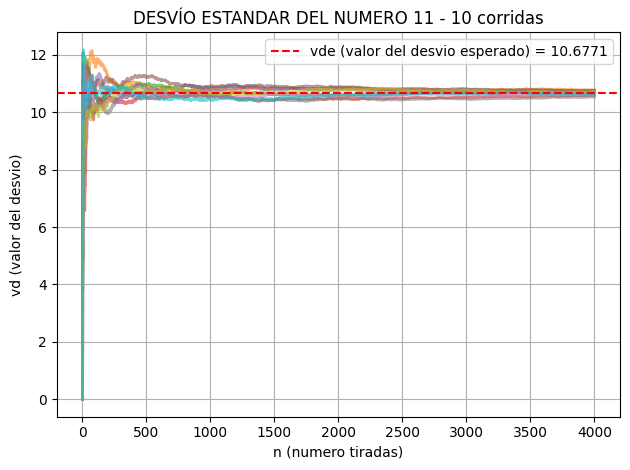

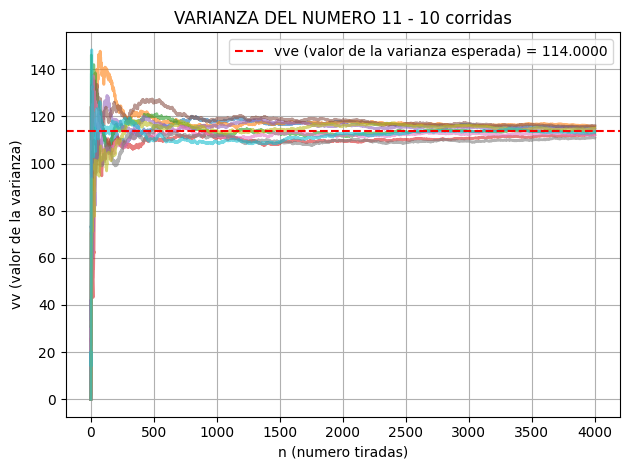

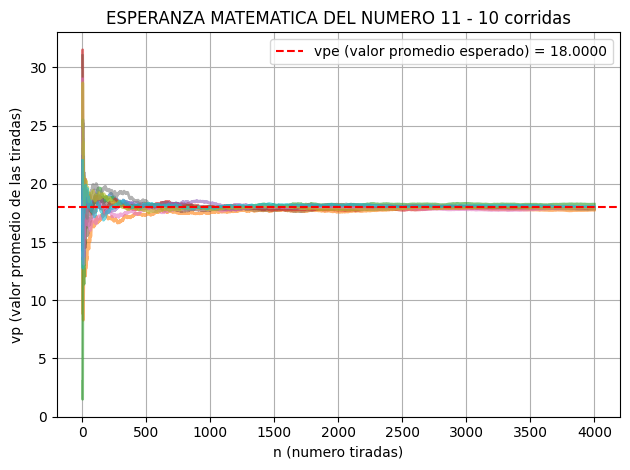

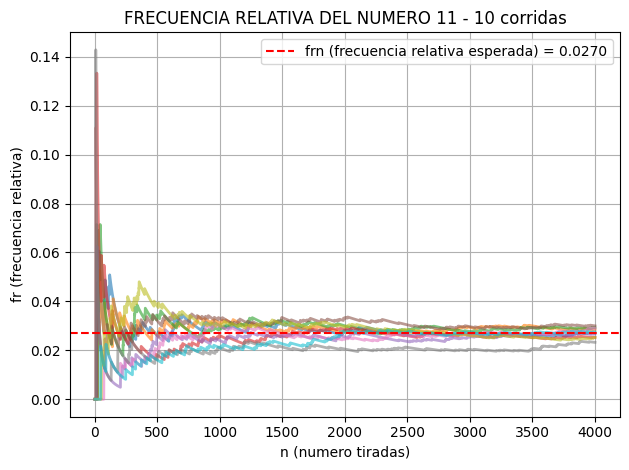

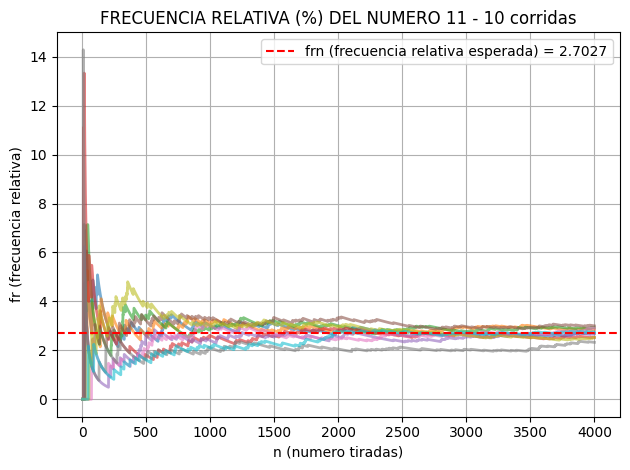

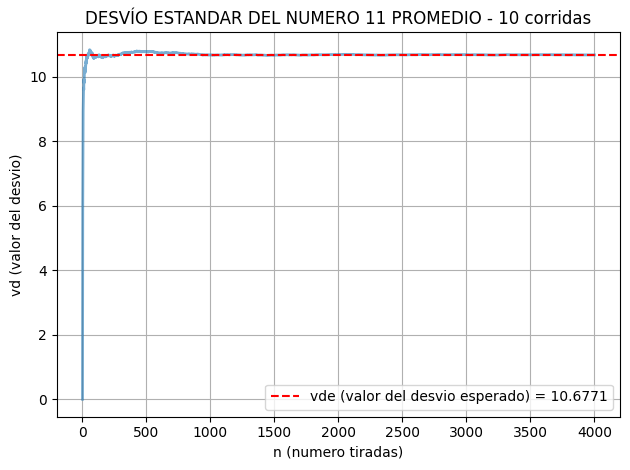

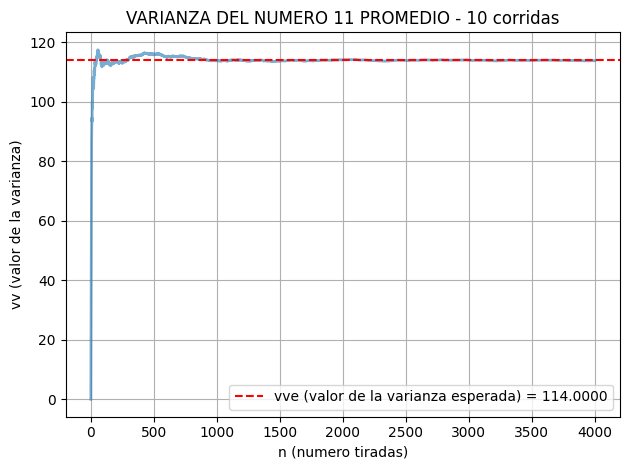

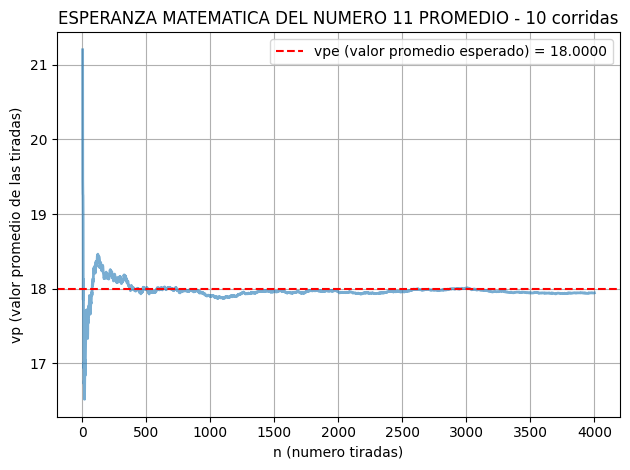

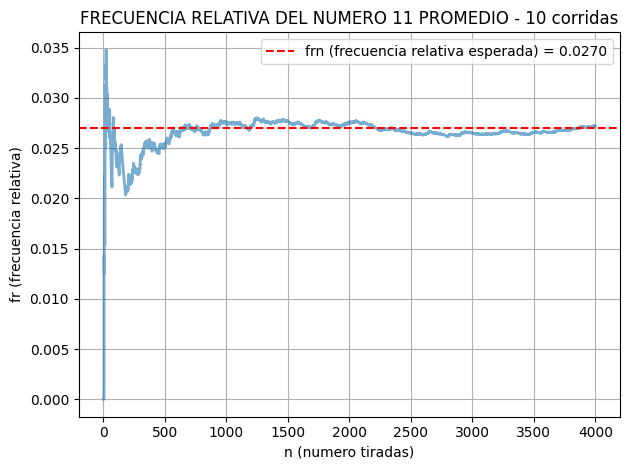

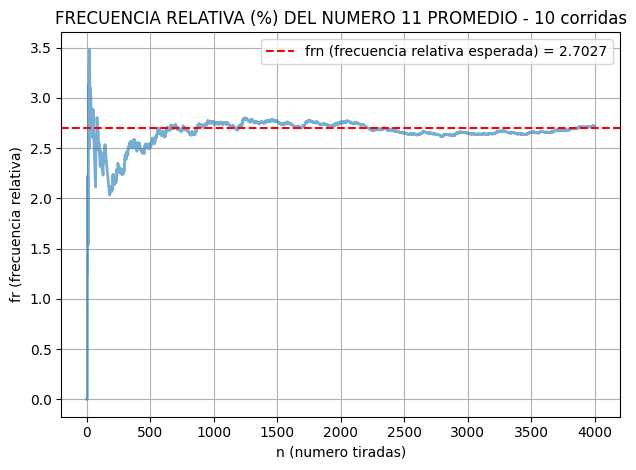

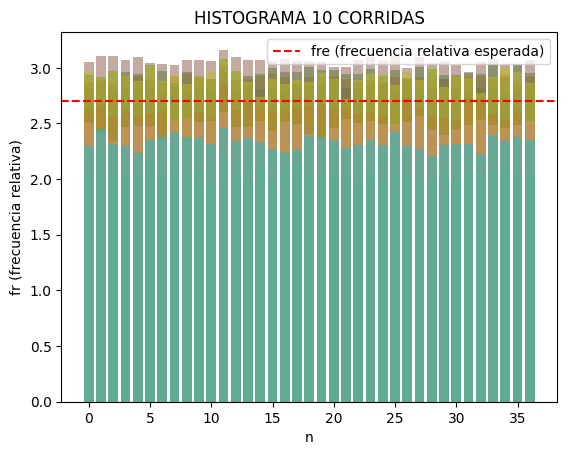

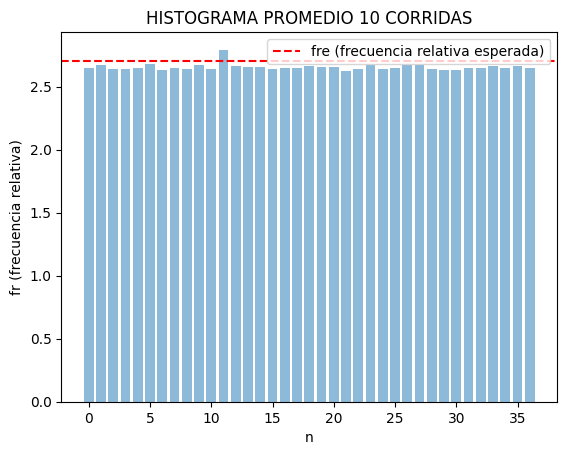

In [261]:
### MAIN ###
corridas = []
for corrida in range(cantidad_corridas):
    corridas.append(ejecutar_corrida())
df_promedio_list = []
df_promedio = pd.concat(corridas).groupby(level=0).mean()
df_promedio_list.append(df_promedio)
graficar(corridas, False)
graficar(df_promedio_list, True)
histogramas = calcular_histograma(corridas)
histograma_promedio_list = []
histograma_promedio = pd.concat(histogramas).groupby(level=0).mean()
histograma_promedio_list.append(histograma_promedio)
graficar_histograma(histogramas, False)
graficar_histograma(histograma_promedio_list, True)

In [262]:
histograma_promedio_list

[    tiradas  frec_rel   frec_abs  frec_rel_%
 0       0.0  0.026477  54.203086    2.647697
 1       1.0  0.026697  54.369923    2.669672
 2       2.0  0.026385  51.856727    2.638466
 3       3.0  0.026415  52.062850    2.641491
 4       4.0  0.026494  54.360192    2.649380
 5       5.0  0.026781  53.230726    2.678090
 6       6.0  0.026333  54.333640    2.633326
 7       7.0  0.026476  53.914228    2.647648
 8       8.0  0.026427  52.789535    2.642716
 9       9.0  0.026726  54.631595    2.672583
 10     10.0  0.026379  54.066307    2.637893
 11     11.0  0.027938  54.850000    2.793808
 12     12.0  0.026650  53.779120    2.664951
 13     13.0  0.026568  54.057585    2.656833
 14     14.0  0.026575  54.006131    2.657500
 15     15.0  0.026423  52.307764    2.642286
 16     16.0  0.026510  53.906492    2.651000
 17     17.0  0.026498  54.038545    2.649849
 18     18.0  0.026657  53.586590    2.665673
 19     19.0  0.026581  52.666552    2.658082
 20     20.0  0.026544  54.686339 

In [263]:
histogramas = calcular_histograma(corridas)
histogramas

[    tiradas  frec_rel   frec_abs  frec_rel_%
 0         0  0.028078  56.268519    2.807831
 1         1  0.028747  54.550847    2.874731
 2         2  0.028007  54.691589    2.800654
 3         3  0.028261  50.589744    2.826090
 4         4  0.028228  55.000000    2.822836
 5         5  0.028280  53.660377    2.827981
 6         6  0.027697  60.371429    2.769665
 7         7  0.028246  51.939655    2.824646
 8         8  0.027787  58.575758    2.778689
 9         9  0.028285  52.961165    2.828531
 10       10  0.027822  53.858333    2.782170
 11       11  0.029465  54.500000    2.946491
 12       12  0.027947  56.101010    2.794733
 13       13  0.028286  53.766667    2.828571
 14       14  0.028072  59.141593    2.807156
 15       15  0.028200  54.956897    2.819980
 16       16  0.028026  57.457447    2.802620
 17       17  0.028168  54.161017    2.816802
 18       18  0.028458  54.336842    2.845833
 19       19  0.028490  54.937500    2.848983
 20       20  0.028839  52.676471 

In [264]:
df_promedio

,tiradas,frec_abs,frec_rel,frec_rel_%,esp_mat,desv_est,var
1,21.2,0.0,0.000000,0.000000,21.200000,0.000000,0.000000
2,17.7,0.0,0.000000,0.000000,19.450000,3.650000,16.825000
3,18.9,0.0,0.000000,0.000000,19.266667,6.040713,45.444444
4,19.2,0.0,0.000000,0.000000,19.250000,7.203721,57.612500
5,17.8,0.0,0.000000,0.000000,18.960000,8.614811,80.048000
...,...,...,...,...,...,...,...
3996,15.7,108.7,0.027202,2.720220,17.941792,10.671436,113.885512
3997,20.5,108.7,0.027195,2.719540,17.942432,10.671772,113.892742
3998,18.9,108.7,0.027189,2.718859,17.942671,10.671583,113.888744
3999,21.1,108.7,0.027182,2.718180,17.943461,10.671379,113.884434


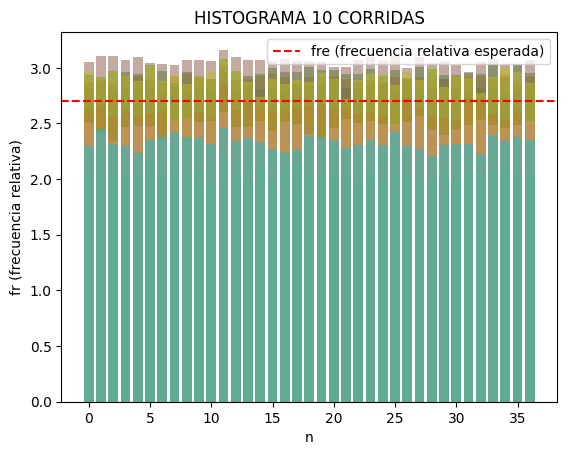

In [265]:
graficar_histograma(histogramas, False)

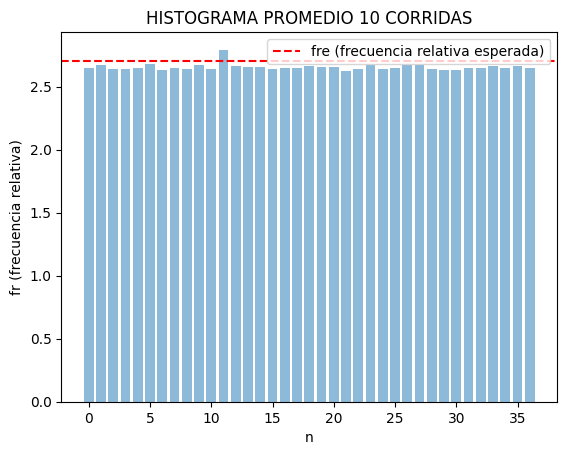

In [266]:
graficar_histograma(histograma_promedio_list, True)

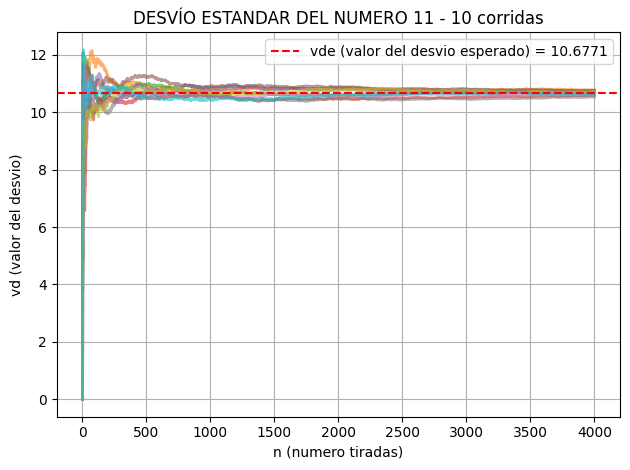

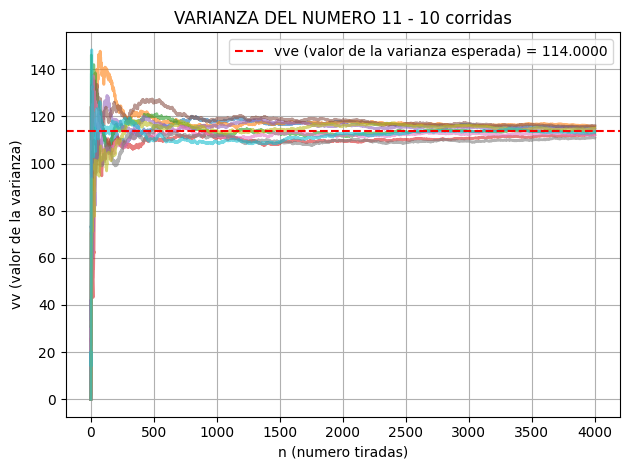

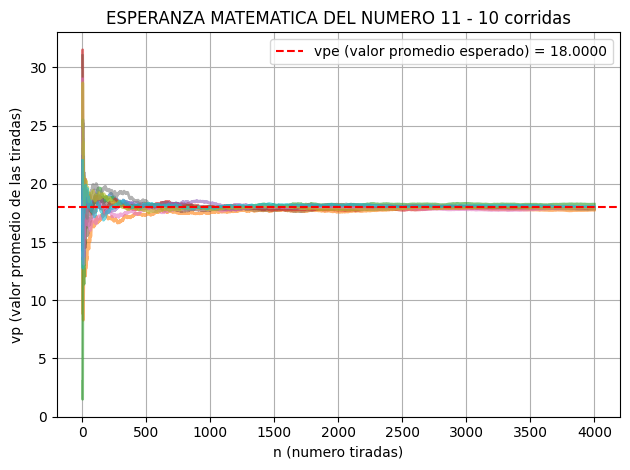

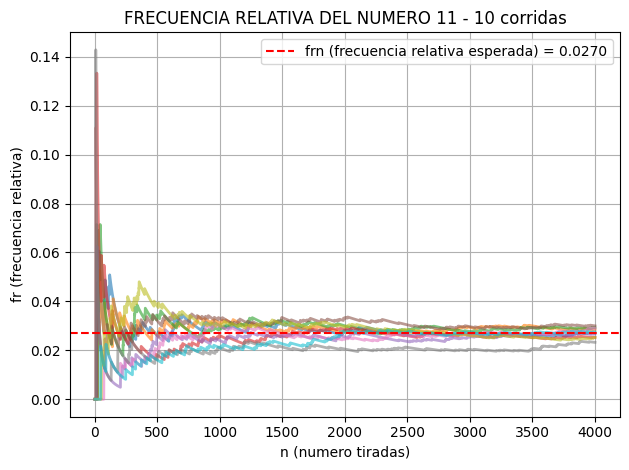

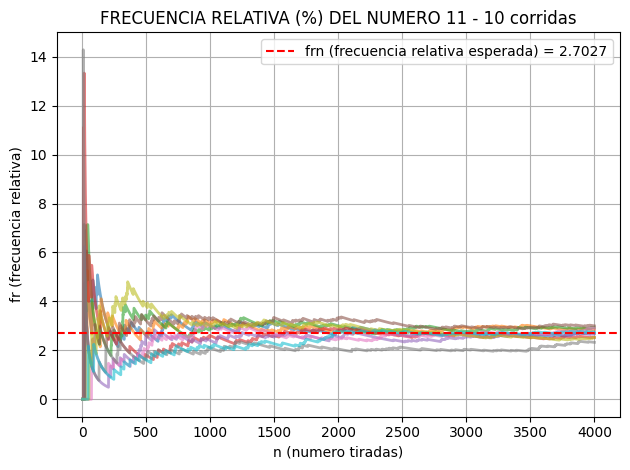

In [267]:
graficar(corridas, False)

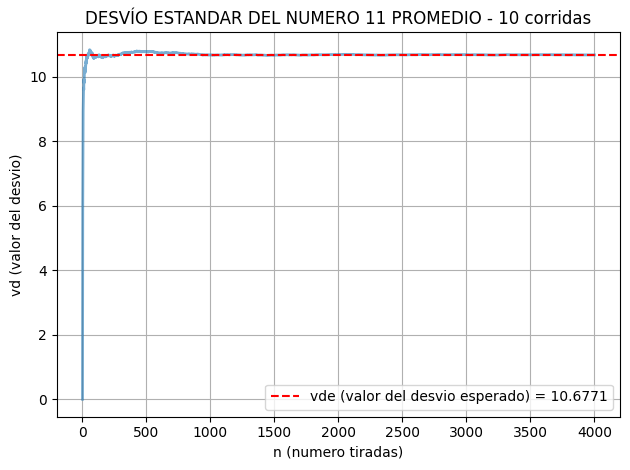

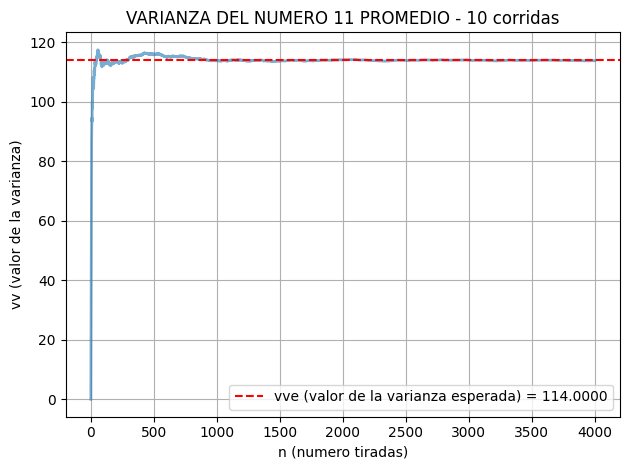

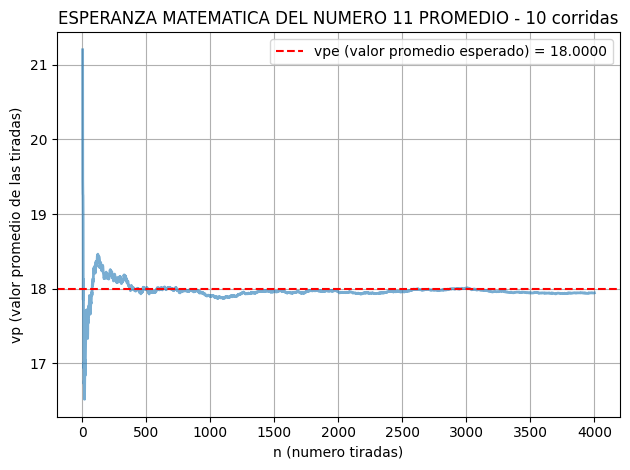

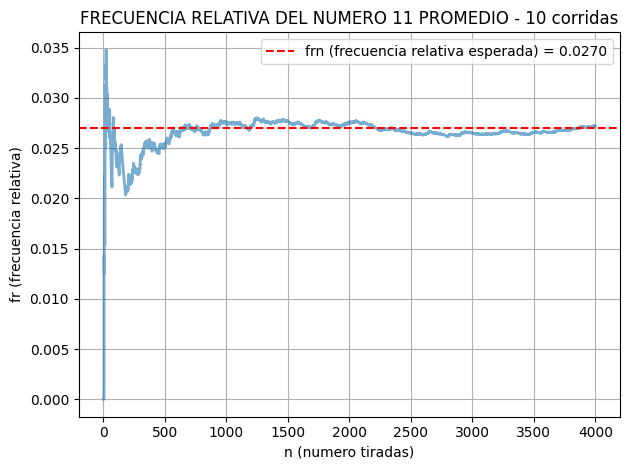

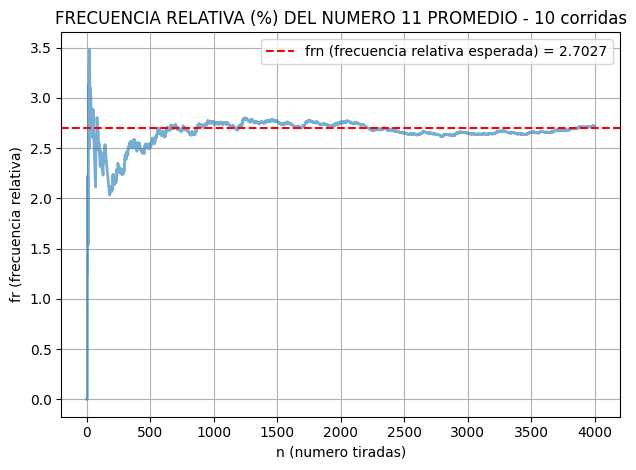

In [268]:
graficar(df_promedio_list, True)

In [269]:
corridas

[      tiradas  frec_abs  frec_rel  frec_rel_%    esp_mat   desv_est  \
 1          17         0  0.000000    0.000000  17.000000   0.000000   
 2          27         0  0.000000    0.000000  22.000000   5.000000   
 3           6         0  0.000000    0.000000  16.666667   8.576454   
 4           7         0  0.000000    0.000000  14.250000   8.525696   
 5          25         0  0.000000    0.000000  16.400000   8.754427   
 ...       ...       ...       ...         ...        ...        ...   
 3996       30       108  0.027027    2.702703  17.810811  10.740535   
 3997       31       108  0.027020    2.702027  17.814111  10.741217   
 3998        5       108  0.027014    2.701351  17.810905  10.741785   
 3999       22       108  0.027007    2.700675  17.811953  10.740647   
 4000       24       108  0.027000    2.700000  17.813500  10.739749   
 
              var  
 1       0.000000  
 2      25.000000  
 3      73.555556  
 4      72.687500  
 5      76.640000  
 ...          

In [270]:
df_promedio_list

[      tiradas  frec_abs  frec_rel  frec_rel_%    esp_mat   desv_est  \
 1        21.2       0.0  0.000000    0.000000  21.200000   0.000000   
 2        17.7       0.0  0.000000    0.000000  19.450000   3.650000   
 3        18.9       0.0  0.000000    0.000000  19.266667   6.040713   
 4        19.2       0.0  0.000000    0.000000  19.250000   7.203721   
 5        17.8       0.0  0.000000    0.000000  18.960000   8.614811   
 ...       ...       ...       ...         ...        ...        ...   
 3996     15.7     108.7  0.027202    2.720220  17.941792  10.671436   
 3997     20.5     108.7  0.027195    2.719540  17.942432  10.671772   
 3998     18.9     108.7  0.027189    2.718859  17.942671  10.671583   
 3999     21.1     108.7  0.027182    2.718180  17.943461  10.671379   
 4000     19.0     108.7  0.027175    2.717500  17.943725  10.671017   
 
              var  
 1       0.000000  
 2      16.825000  
 3      45.444444  
 4      57.612500  
 5      80.048000  
 ...          